### Obtaining the raw Heterogeneity Activity Recognition (HAR) dataset and converting it for a memory mappable format

Data can be downloaded from [this link](https://archive.ics.uci.edu/ml/datasets/Heterogeneity+Activity+Recognition).

The data is in a zip archive, in multiple CSV files. To get the most out of Vaex, it is best if the data is in memory mappable file format. 

This short notebook shows how easy this is.

In [1]:
from glob import glob

import vaex

Make a list of files to be converted. 

In [2]:
csv_files = glob('./data/raw_data/*.csv')

Converting a CSV to the memory mappable HDF5 file format is easy: all we need to do is specify the `convert=True` key word argument in `vaex.read_csv`. The `convert` keyword can also accept a string corresponding to the path and file name of the converted file. The `vaex.read_csv` method wraps around `pandas.read_csv` so we use all the options Pandas provides.

If the CSV file is too big to fit into memory, it is read in chunks. The chunks are exported to HDF5, and when the whole CSV is read, the chunks are concatenated into a single file HDF5 file, and the intermediate files are deleted. All this is handled behind the scenes by Vaex, so we do not have to worry about it at all.  

In [3]:
for file in csv_files:
    df = vaex.read_csv(file, convert=True)

We can check that the files were successfully converted

In [4]:
!ls ./data/raw_data/

Phones_accelerometer.csv      Watch_accelerometer.csv.hdf5
Phones_accelerometer.csv.hdf5 Watch_gyroscope.csv
Phones_gyroscope.csv          Watch_gyroscope.csv.hdf5
Phones_gyroscope.csv.hdf5     readme.txt
Watch_accelerometer.csv


Note that when when try to open a file that has already been converted from CSV to HDF5, we can use the same `vaex.read_csv` method with the `convert=True` keyword specified. Vaex will first check whether the conversion has already been done, and if it has, it will open the HDF5 file right away!

In [5]:
%time
file_to_open = './data/raw_data/Phones_accelerometer.csv'
df = vaex.read_csv(file_to_open, convert=True)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


We are now ready to explore and work with these data! 
For example let's see all the possible activities, and how many of them there are:

In [6]:
df.gt.value_counts()

missing         83125
              2620183
walk          2019792
sit           1827626
stand         1719765
bike          1702316
stairsup      1619212
stairsdown    1470456
dtype: int64

Finally, let's get the distribution of the x-axis for each of the activities:

In [7]:
# Handle missing values
df['gt'] = df.gt.fillna('none')
# # Handle empty strings
df['gt'] = df.func.where(df.gt == '', 'none', df.gt)

In [8]:
# Get all the activities
activities = df.gt.unique().tolist()

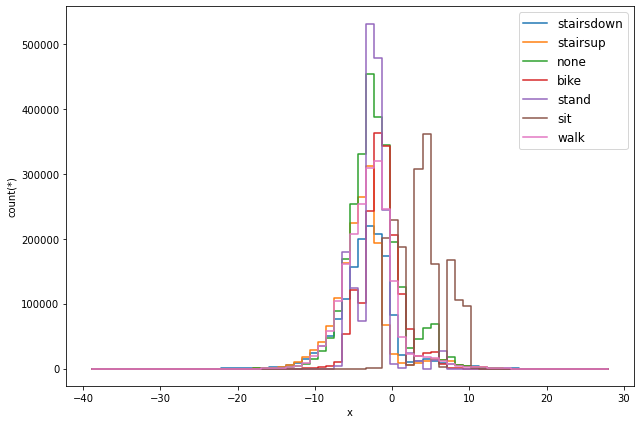

In [9]:
import pylab as plt
plt.figure(figsize=(9, 6))
for activity in activities:
    df.plot1d('x', selection=f'gt=="{activity}"', label=activity)
plt.legend(fontsize=12)
plt.show()


Have fun exploring this dataset!